# Avocado Study

**Problem Statement:**

Avocado is a fruit consumed by people heavily in the United States.

*Content*

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold


**Inspiration/Label**

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#### Importing data-set

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## Univariate analysis

In [4]:
df.shape

(18249, 14)

There are 18249 rows and 14 columns.

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Only Date, type and region columns are string type, the rest are either float or int type.

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

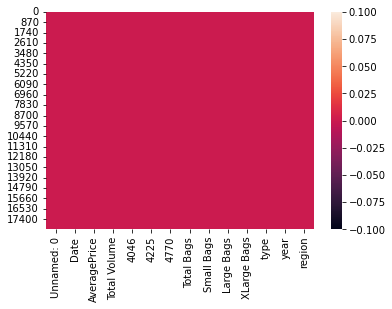

In [8]:
sns.heatmap(df.isnull())

There are no empty values in the data set

In [9]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


There is very high standard deviation in xlarge bags, and some standard deviation Unnamed: 0. Every other column has much lower values.

In [10]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

We can infer from this and the problem statement that the columns of Unnamed: 0, and the bags related columns are irrelevant to our problem. So we will drop them before further analysis.

In [4]:
df.drop(['Unnamed: 0','Total Bags','Small Bags','Large Bags','XLarge Bags'], axis=1, inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


Those columns have been removed. Now we can proceed.

In [5]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.036531
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,1.000000


<AxesSubplot:>

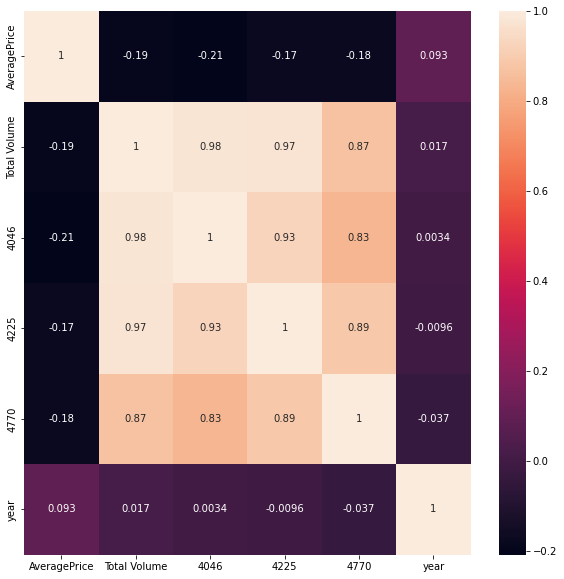

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

We can see that there is very high correlation between 4046,4225,4770 and Total Volume. This makes sense because they all represent the number of avocados sold.

In [15]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
year             0.215339
dtype: float64

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

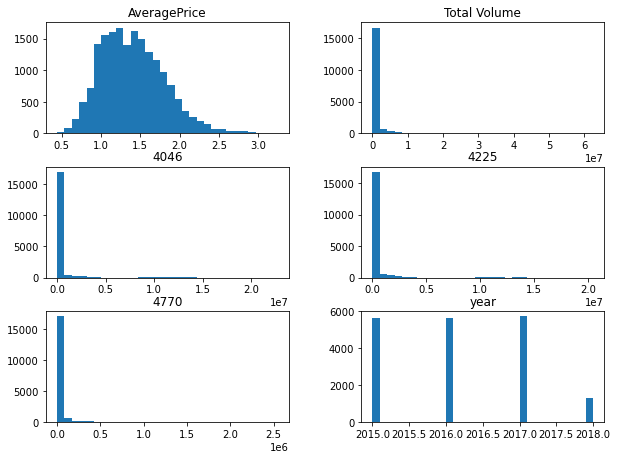

In [17]:
df.hist(figsize=(10,10), grid=False, layout=(4, 2), bins = 30)

There is *very* high skewness in total volume, 4046, 4225 and 4770.

Text(0.5, 1.0, 'Total number of avocados sold')

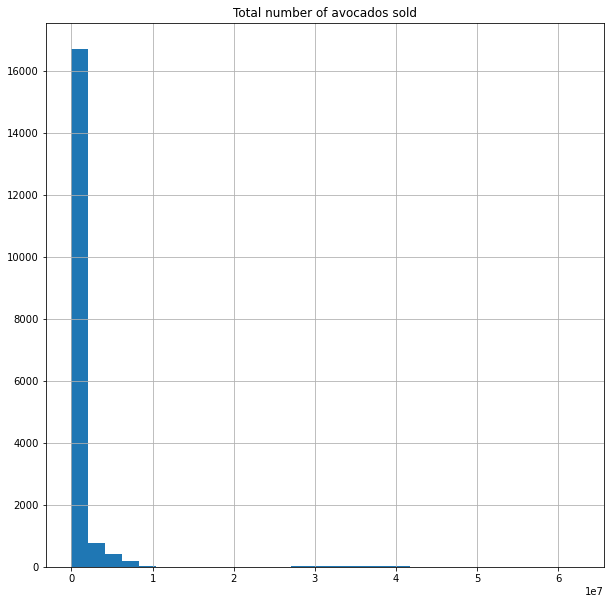

In [20]:
df['Total Volume'].hist(figsize=(10,10), bins=30)
plt.title('Total number of avocados sold')

There is very high skewness as the total volume (number of avocados sold) starts off very high but declines over time.

Text(0.5, 1.0, 'Number of avocados sold with PSU 4046')

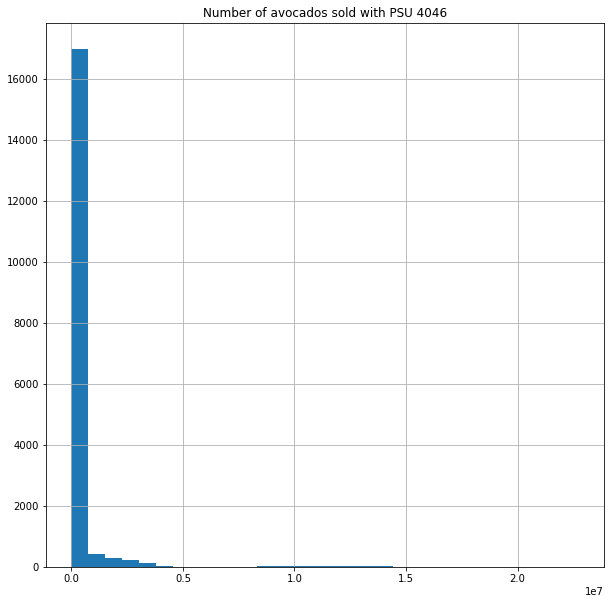

In [21]:
df['4046'].hist(figsize=(10,10), bins=30)
plt.title('Number of avocados sold with PSU 4046')

There is very high skewness as the number of avocados sold with PLU 4046 starts off very high but declines over time.

Text(0.5, 1.0, 'Number of Avocados sold with PSU 4225')

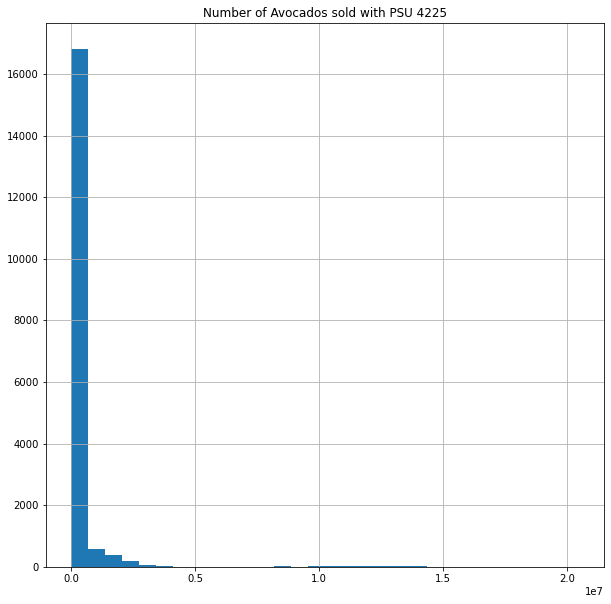

In [22]:
df['4225'].hist(figsize=(10,10), bins=30)
plt.title('Number of Avocados sold with PSU 4225')

There is very high skewness as the number of avocados sold with PLU 4225 starts off very high but declines over time.

Text(0.5, 1.0, 'Number of avocados sold with PLU 4770')

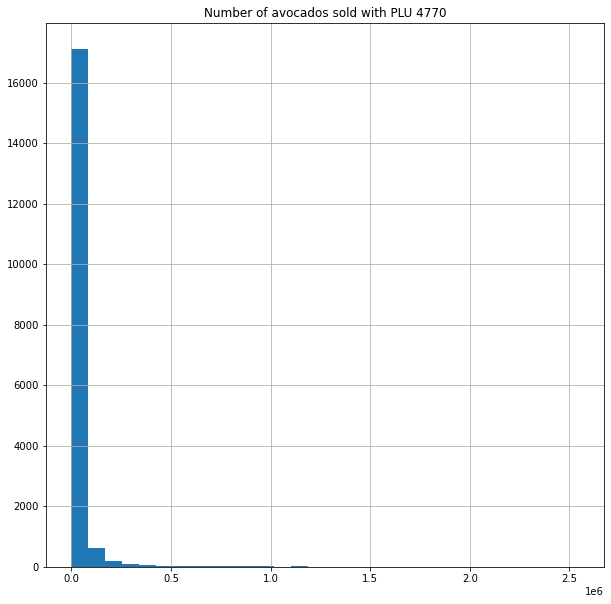

In [23]:
df['4770'].hist(figsize=(10,10), bins=30)
plt.title('Number of avocados sold with PLU 4770')

There is very high skewness as the number of avocados sold with PLU 4770 starts off very high but declines over time.

Text(0.5, 1.0, 'Outliers in the columns')

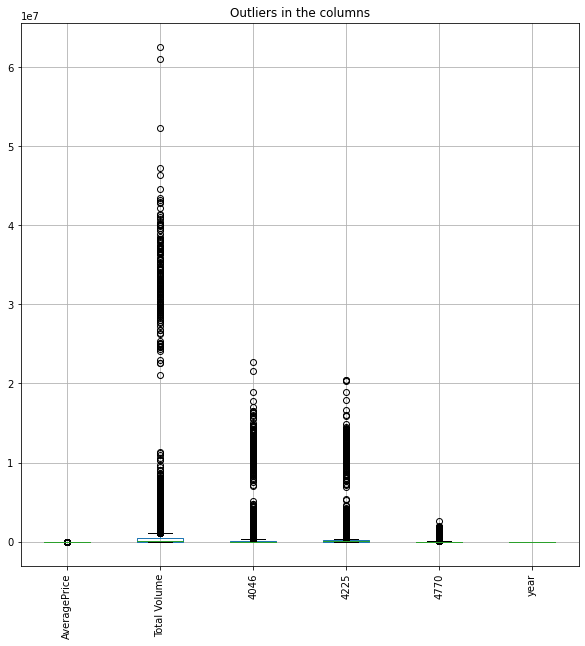

In [24]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

We see outliers in all columns except year.

<AxesSubplot:xlabel='Total Volume'>

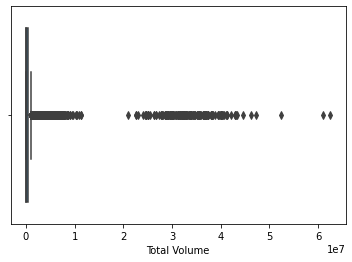

In [25]:
sns.boxplot(df['Total Volume'])

Highest number of outliers are in this column due to the fact that the total number of avocados sold has extreme high values.

<AxesSubplot:xlabel='AveragePrice'>

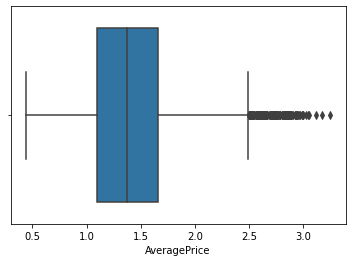

In [26]:
sns.boxplot(df['AveragePrice'])

This column has outliers too but less than the others.

<AxesSubplot:xlabel='4046'>

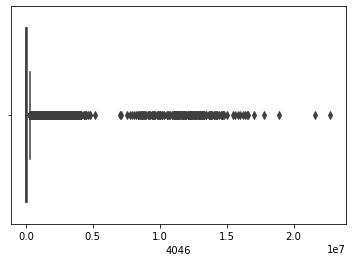

In [27]:
sns.boxplot(df['4046'])

Very high number of outliers are in this column due to the fact that the column has extreme high values.

<AxesSubplot:xlabel='4225'>

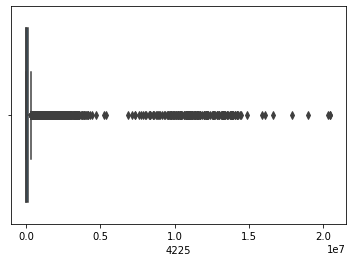

In [29]:
sns.boxplot(df['4225'])

There are slightly less number of outliers are in this column than 4046.

<AxesSubplot:xlabel='4770'>

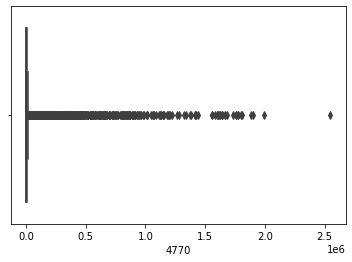

In [30]:
sns.boxplot(df['4770'])

The number of avocados sold with PSU 4770 have the least amount of outliers compared to the others.

<AxesSubplot:ylabel='AveragePrice'>

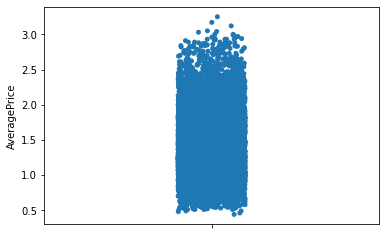

In [31]:
sns.stripplot(y=df['AveragePrice'])

We see that most prices are in the range 0.5 to 3

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

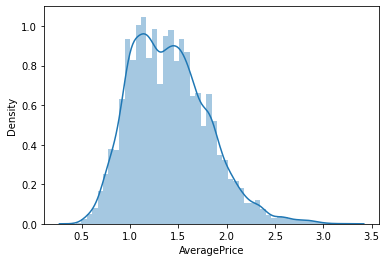

In [32]:
sns.distplot(df['AveragePrice'])

Most prices are in the range 1.0 to 1.5, with the peak at 1.2

<AxesSubplot:xlabel='AveragePrice'>

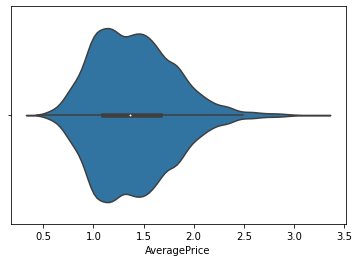

In [33]:
sns.violinplot(df['AveragePrice'])

We see that the distribution is mostly normal, with a mean of 1.4

In [36]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

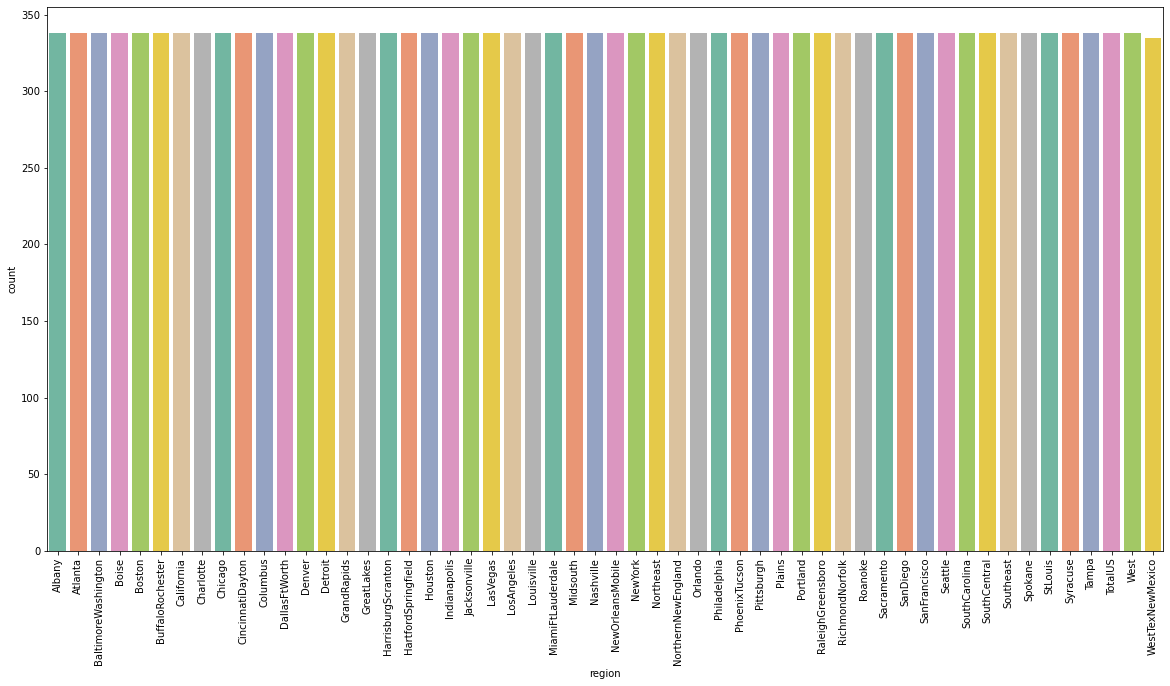

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'region', data = df, palette="Set2")
plt.xticks(rotation=90)

We see that there is an even distribution of regions where the observations are made.

## Bivariate Analysis

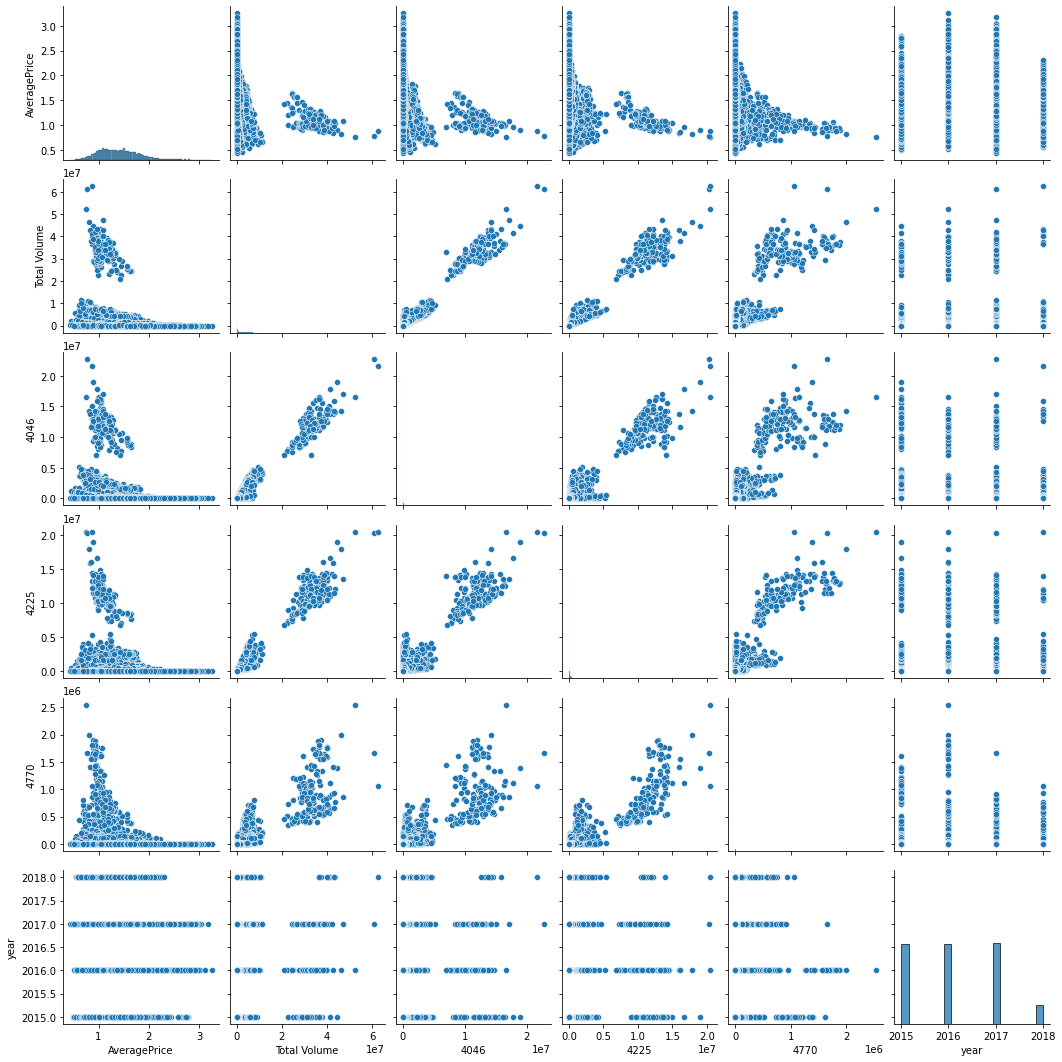

In [5]:
sns.pairplot(df)

#### Relationship between price and year

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

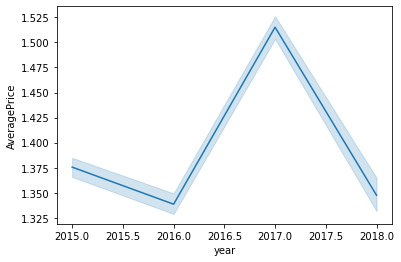

In [7]:
sns.lineplot(df['year'], df['AveragePrice'])

We can observe that the price of the avocado has fluctuated over the years,starting at 1.375 in 2015, with a reduction in 2016, an 4 year high in 2017 and then an all time low at 2018.

(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

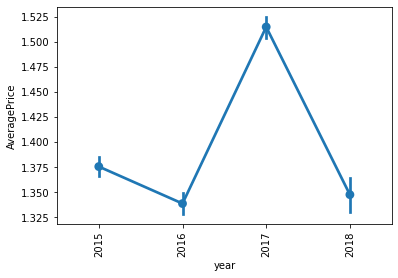

In [9]:
sns.pointplot(x = "year", y = "AveragePrice", data = df)
plt.xticks(rotation=90)

We can observe that the price of the avocado has fluctuated over the years,starting at 1.375 in 2015, with a reduction in 2016, an 4 year high in 2017 and then an all time low at 2018.

#### Relationship between total volume and year

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

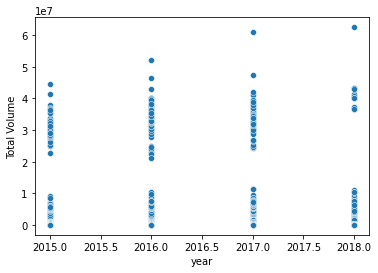

In [16]:
sns.scatterplot(df['year'], df['Total Volume'])

<AxesSubplot:xlabel='type', ylabel='count'>

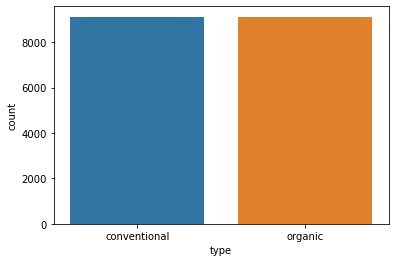

In [22]:
sns.countplot(df['type'])

We can observe that most quantities were sold in 2016 and 2017 but the highest total volume for an individual day was in 2018.

<AxesSubplot:xlabel='year', ylabel='count'>

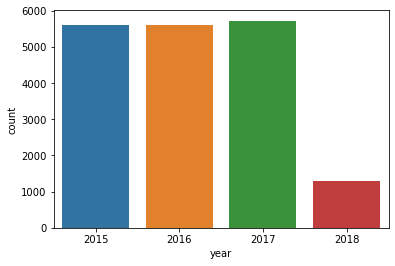

In [18]:
sns.countplot(df['year'])

We see that least sales were made in 2018, which is why least number of avocados were sold in 2018.

#### Relationship between the number of avocados sold by PSU types and total number of avocados sold.

<AxesSubplot:xlabel='Total Volume', ylabel='4046'>

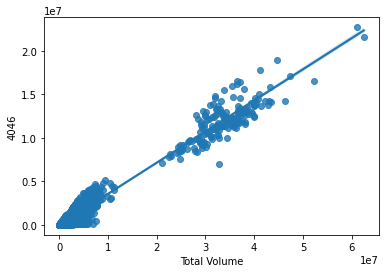

In [19]:
sns.regplot(df['Total Volume'], df['4046'])

We see very high positive correlation between the two columns as we expected since total volume is created by the sum of the other PSU values.

<AxesSubplot:xlabel='Total Volume', ylabel='4225'>

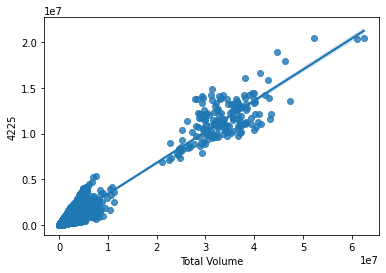

In [20]:
sns.regplot(df['Total Volume'], df['4225'])

We see very high positive correlation, between the two columns as we expected, but less than above.

<AxesSubplot:xlabel='Total Volume', ylabel='4770'>

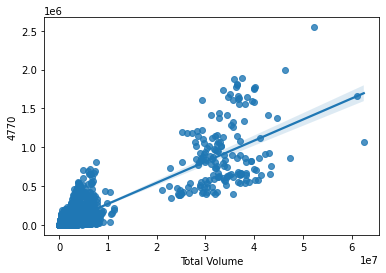

In [21]:
sns.regplot(df['Total Volume'], df['4770'])

There is still high positive correlation but we can observe more residuals than the above two plots for this type.

#### Relationship between the PSU types

<AxesSubplot:xlabel='4046', ylabel='4225'>

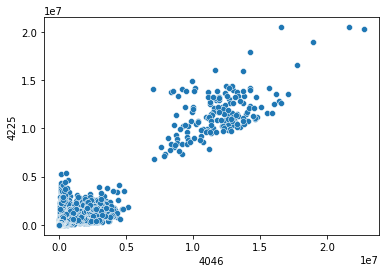

In [29]:
sns.scatterplot(df['4046'], df['4225'])

There are high number of common values when each of the values are lower, but the points begin to get scattered as the quantity/number of avocados sold increases.

<AxesSubplot:xlabel='4046', ylabel='4770'>

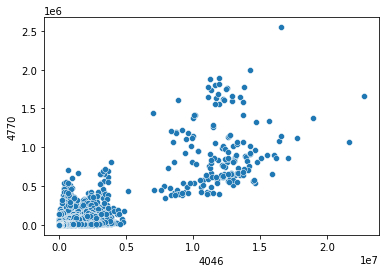

In [30]:
sns.scatterplot(df['4046'], df['4770'])

Similar to the above plot, there are high number of common values when each of the values are lower, but the points begin to get scattered as the quantity/number of avocados sold increases.

However there are more scattered values.

<AxesSubplot:xlabel='4225', ylabel='4770'>

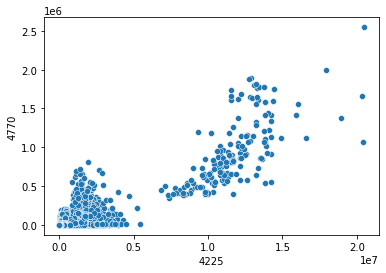

In [31]:
sns.scatterplot(df['4225'], df['4770'])

Same case.

#### Relationship between type and average price

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

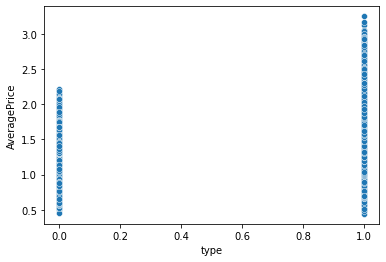

In [37]:
sns.scatterplot(df['type'], df['AveragePrice'])

We can see that the average price is higher for Organic type

## Feature Engineering

In [32]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany


Here, we have dates as random string that does not tell us anything.

We will use the date information to sort the data into months and see if avocado sales increase or decrease in a given month.

In [5]:
df['month'] = [int(x[5:7]) for x in df['Date']]
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11


In [6]:
df['month'].dtype

dtype('int64')

Now we have a column containing the months. So, we can drop the date column.

In [7]:
df.drop('Date', axis=1, inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11


<AxesSubplot:xlabel='month', ylabel='count'>

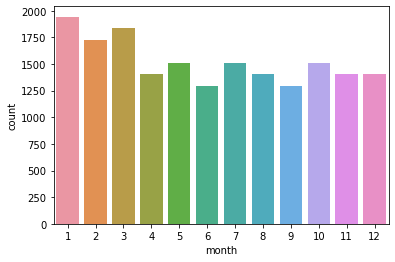

In [8]:
sns.countplot(df['month'])

Now we can see that the highest amount of sales was in January and March.

In [9]:
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

There is no order in the way regions are sorted, so we will also sort the region into the 5 major regions of the US.

In [10]:
west = ['Sacramento', 'Portland', 'SanDiego', 'SanFrancisco', 'Seattle', 'Spokane', 'West', 'BaltimoreWashington', 'Boise', 'California', 'Denver', 'LasVegas', 'LosAngeles']
midwest = ['Plains', 'StLouis', 'TotalUS', 'Chicago', 'CincinnatiDayton', 'Columbus', 'GrandRapids', 'GreatLakes', 'Indianapolis', 'Detroit']
northeast = ['Albany', 'Northeast', 'NorthernNewEngland', 'Philadelphia', 'Pittsburgh', 'Syracuse', 'NewYork', 'Boston', 'BuffaloRochester', 'HarrisburgScranton', 'HartfordSpringfield']
southeast = ['Orlando', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Atlanta', 'SouthCarolina', 'Southeast', 'Tampa', 'NewOrleansMobile', 'Nashville', 'Charlotte', 'Jacksonville', 'Louisville', 'MiamiFtLauderdale']
southwest = ['PhoenixTucson', 'SouthCentral', 'Midsouth', 'DallasFtWorth', 'Houston', 'WestTexNewMexico']

In [11]:
for i in west:
    df.loc[df['region'] == i, 'region'] = 'west'
for i in midwest:
    df.loc[df['region'] == i, 'region'] = 'midwest'
for i in northeast:
    df.loc[df['region'] == i, 'region'] = 'northeast'
for i in southeast:
    df.loc[df['region'] == i, 'region'] = 'southeast'
for i in southwest:
    df.loc[df['region'] == i, 'region'] = 'southwest'

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,northeast,12
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,northeast,12
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,northeast,12
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,northeast,12
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,northeast,11


In [13]:
df['region'].value_counts()

southeast    4732
west         4394
northeast    3718
midwest      3380
southwest    2025
Name: region, dtype: int64

Now we have the region column sorted by actual regions of the US.

<AxesSubplot:xlabel='region', ylabel='count'>

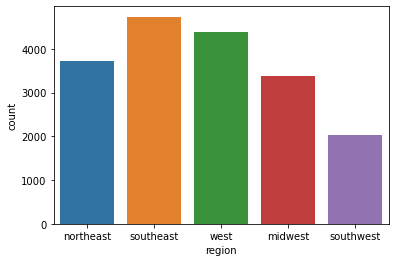

In [13]:
sns.countplot(df['region'])

We can see that most avocado sales took place in the south east US, and least in the south west.

## Encoding the object type columns

In [16]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
type             object
year              int64
region           object
month             int64
dtype: object

In [14]:
le = LabelEncoder()
list1 = ['type', 'region']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [15]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
type              int32
year              int64
region            int32
month             int64
dtype: object

In [16]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015,1,12
1,1.35,54876.98,674.28,44638.81,58.33,0,2015,1,12
2,0.93,118220.22,794.70,109149.67,130.50,0,2015,1,12
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015,1,12
4,1.28,51039.60,941.48,43838.39,75.78,0,2015,1,11


Now all columns are numerical type.

## Removing skewness

In [17]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
type             0.000329
year             0.215339
region           0.083909
month            0.106617
dtype: float64

In [18]:
df['Total Volume'] = np.sqrt(df['Total Volume'])
df['4046'] = np.sqrt(df['4046'])
df['4225'] = np.sqrt(df['4225'])
df['4770'] = np.sqrt(df['4770'])

We cannot use np.log since it gives output in -infinity values.

In [19]:
df.skew()

AveragePrice    0.580303
Total Volume    3.986597
4046            3.952972
4225            3.896355
4770            4.128605
type            0.000329
year            0.215339
region          0.083909
month           0.106617
dtype: float64

In [20]:
df['Total Volume'] = np.sqrt(df['Total Volume'])
df['4046'] = np.sqrt(df['4046'])
df['4225'] = np.sqrt(df['4225'])
df['4770'] = np.sqrt(df['4770'])

In [21]:
df.skew()

AveragePrice    0.580303
Total Volume    1.531126
4046            1.541756
4225            1.387105
4770            1.471863
type            0.000329
year            0.215339
region          0.083909
month           0.106617
dtype: float64

In [22]:
df['Total Volume'] = np.sqrt(df['Total Volume'])
df['4046'] = np.sqrt(df['4046'])
df['4225'] = np.sqrt(df['4225'])
df['4770'] = np.sqrt(df['4770'])

In [23]:
df.skew()

AveragePrice    0.580303
Total Volume    0.701453
4046            0.458845
4225            0.376267
4770            0.142641
type            0.000329
year            0.215339
region          0.083909
month           0.106617
dtype: float64

We have removed the skewness. Now we can proceed.

<AxesSubplot:xlabel='Total Volume', ylabel='Count'>

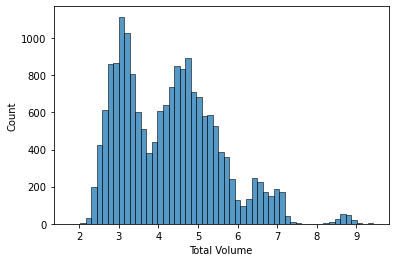

In [21]:
sns.histplot(df['Total Volume'])

Now we have a normal distribution for total volume.

<AxesSubplot:xlabel='4046', ylabel='Count'>

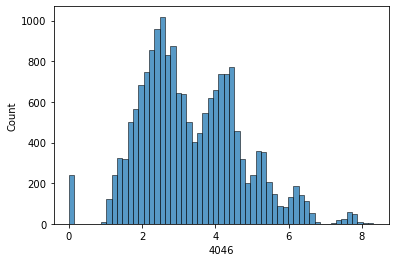

In [22]:
sns.histplot(df['4046'])

Now we have a normal distribution for 4046.

<AxesSubplot:xlabel='4225', ylabel='Count'>

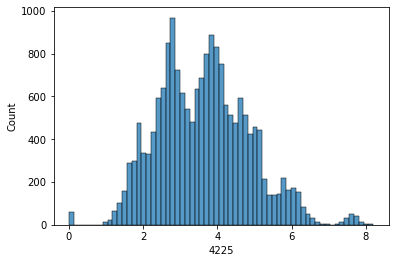

In [23]:
sns.histplot(df['4225'])

Now we have a normal distribution for 4225.

<AxesSubplot:xlabel='4770', ylabel='Count'>

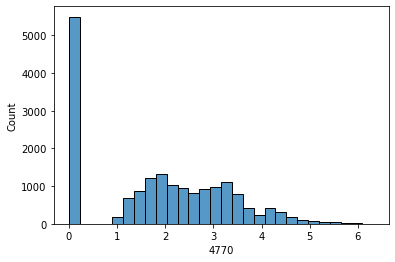

In [24]:
sns.histplot(df['4770'])

Now we have a normal distribution for 4770.

## Checking multi-collinearity with Variance Inflation Factor

In [24]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [25]:
vif_calc()

,variables,VIF FACTOR
0,AveragePrice,25.263876
1,Total Volume,318.481520
2,4046,55.999603
3,4225,113.404041
4,4770,10.327394
5,type,6.630596
6,year,80.597093
7,region,3.513970
8,month,4.256333


There is a very high level of multi-collinearity

<AxesSubplot:>

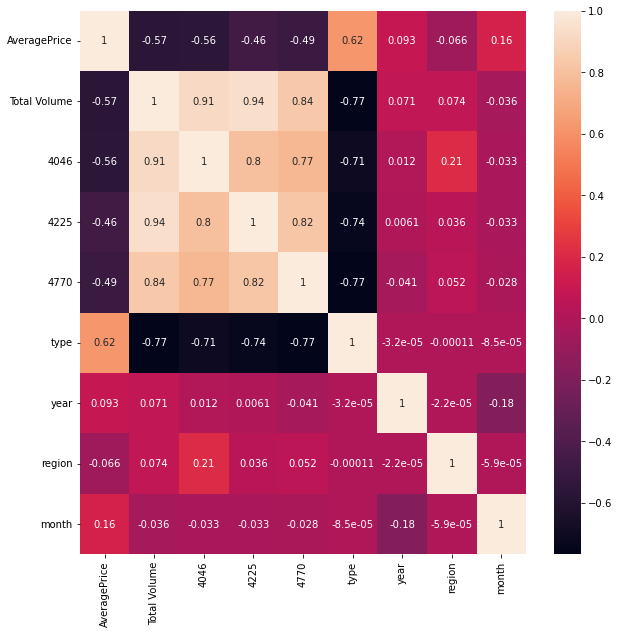

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

We will drop the individual PSU types since Total Volume column already contains that information, and it is more positively correlated to the values of region and average prices compared to the other PSU types.

In [27]:
df.drop(['4046', '4225', '4770'], axis=1, inplace=True)
df.head()

,AveragePrice,Total Volume,type,year,region,month
0,1.33,3.989999,0,2015,1,12
1,1.35,3.912225,0,2015,1,12
2,0.93,4.306123,0,2015,1,12
3,1.08,4.094473,0,2015,1,12
4,1.28,3.876934,0,2015,1,11


In [28]:
vif_calc()

,variables,VIF FACTOR
0,AveragePrice,23.029178
1,Total Volume,32.414042
2,type,5.631990
3,year,71.438758
4,region,3.072353
5,month,4.238093


We can see the multicollinearity has reduced significantly.

## Splitting data for training and testing

## First we will do classification training and testing by using region as the output.

#### Moving output column to the end

In [29]:
region = df['region']
df.drop('region', axis=1, inplace=True)
df['region'] = region
df.head()

,AveragePrice,Total Volume,type,year,month,region
0,1.33,3.989999,0,2015,12,1
1,1.35,3.912225,0,2015,12,1
2,0.93,4.306123,0,2015,12,1
3,1.08,4.094473,0,2015,12,1
4,1.28,3.876934,0,2015,11,1


In [30]:
x = df.iloc[:,0:-1]
x

,AveragePrice,Total Volume,type,year,month
0,1.33,3.989999,0,2015,12
1,1.35,3.912225,0,2015,12
2,0.93,4.306123,0,2015,12
3,1.08,4.094473,0,2015,12
4,1.28,3.876934,0,2015,11
...,...,...,...,...,...
18244,1.63,3.380995,1,2018,2
18245,1.71,3.294808,1,2018,1
18246,1.87,3.291198,1,2018,1
18247,1.93,3.358976,1,2018,1


In [31]:
y = df.iloc[:,-1]
y

0        1
1        1
2        1
3        1
4        1
        ..
18244    3
18245    3
18246    3
18247    3
18248    3
Name: region, Length: 18249, dtype: int32

#### Models

In [32]:
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [33]:
models = [knn, svc, dtc, rf]

#### Finding best random state

In [35]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    rf.fit(xtrain,ytrain)
    pred = rf.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.6304109589041096
At random score 1, accuracy score is 0.6389041095890411
At random score 2, accuracy score is 0.6356164383561644
At random score 3, accuracy score is 0.6191780821917808
At random score 4, accuracy score is 0.6336986301369864
At random score 5, accuracy score is 0.6315068493150685
At random score 6, accuracy score is 0.6375342465753424
At random score 7, accuracy score is 0.6271232876712329
At random score 8, accuracy score is 0.6273972602739726
At random score 9, accuracy score is 0.6383561643835617
At random score 10, accuracy score is 0.6361643835616438
At random score 11, accuracy score is 0.6476712328767124
At random score 12, accuracy score is 0.6391780821917808
At random score 13, accuracy score is 0.6271232876712329
At random score 14, accuracy score is 0.6356164383561644
At random score 15, accuracy score is 0.6350684931506849
At random score 16, accuracy score is 0.6284931506849315
At random score 17, accuracy score is 0.6

#### We will proceed with random state 86 

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=86)

In [37]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    pred = i.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'Model {i} had training score of {training_score.mean()*100}% and an accuracy score of {score}')

Model KNeighborsClassifier() had training score of 51.26379600820322% and an accuracy score of 0.5676712328767123
Model SVC() had training score of 25.768887825160615% and an accuracy score of 0.26575342465753427
Model DecisionTreeClassifier() had training score of 53.81196178086884% and an accuracy score of 0.5586301369863014
Model RandomForestClassifier() had training score of 61.250759079624764% and an accuracy score of 0.6493150684931507


#### We will proceed with random forest classifier

In [43]:
parameters = { 
    'n_estimators': [200, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(1,5)
}

In [44]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [45]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

#### There are the parameters we will put in the model for final training and testing.

In [46]:
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=5, n_estimators=500)

In [47]:
cross_val_score(rf, xtrain,ytrain,cv=5)

array([0.61712329, 0.63116438, 0.61438356, 0.62294521, 0.62384378])

In [48]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 62.12751364466157


In [49]:
print(f'The accuracy score is {accuracy_score(ytest, pred)}')

The accuracy score is 0.6578082191780822


In [50]:
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

[[336  41 166  39  50]
 [ 35 504 132   9  86]
 [109  84 670  18  89]
 [ 32   8  14 285  58]
 [ 42  78 124  35 606]]
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       632
           1       0.70      0.66      0.68       766
           2       0.61      0.69      0.65       970
           3       0.74      0.72      0.73       397
           4       0.68      0.68      0.68       885

    accuracy                           0.66      3650
   macro avg       0.67      0.66      0.66      3650
weighted avg       0.66      0.66      0.66      3650



### Conclusion of classification: Random Forest Classifier is the best model with cross val score of 62, and accuracy score of 65.78%

## Regression training and testing by using average price as output.

#### Moving output column to the end

In [51]:
price = df['AveragePrice']
df.drop('AveragePrice', axis=1, inplace=True)
df['AveragePrice'] = price
df.head()

,Total Volume,type,year,month,region,AveragePrice
0,3.989999,0,2015,12,1,1.33
1,3.912225,0,2015,12,1,1.35
2,4.306123,0,2015,12,1,0.93
3,4.094473,0,2015,12,1,1.08
4,3.876934,0,2015,11,1,1.28


In [52]:
x = df.iloc[:,0:-1]
x

,Total Volume,type,year,month,region
0,3.989999,0,2015,12,1
1,3.912225,0,2015,12,1
2,4.306123,0,2015,12,1
3,4.094473,0,2015,12,1
4,3.876934,0,2015,11,1
...,...,...,...,...,...
18244,3.380995,1,2018,2,3
18245,3.294808,1,2018,1,3
18246,3.291198,1,2018,1,3
18247,3.358976,1,2018,1,3


In [53]:
y = df.iloc[:,-1]
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

#### Models

In [54]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()
knnr = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [55]:
models = [lr, ridge, lasso, en, knnr, svr, dtr, rfr]

#### Finding best random state

In [56]:
best_random_state = 0
lowest_error = 100000
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    error = mean_squared_error(ytest, pred)
    print(f'At random score {i}, mean squared error is {error}')
    if error < lowest_error:
        lowest_error = error
        best_random_state = i
print(f'Lowest error is {lowest_error} at random state {best_random_state}')

At random score 0, mean squared error is 0.08877238351823233
At random score 1, mean squared error is 0.08900537963048682
At random score 2, mean squared error is 0.09044777161396085
At random score 3, mean squared error is 0.08751474041842541
At random score 4, mean squared error is 0.09298259979415566
At random score 5, mean squared error is 0.0887653590176533
At random score 6, mean squared error is 0.08856322630275848
At random score 7, mean squared error is 0.08954153748768892
At random score 8, mean squared error is 0.08543365820778906
At random score 9, mean squared error is 0.0948248351537149
At random score 10, mean squared error is 0.08933008346823991
At random score 11, mean squared error is 0.08741945831781212
At random score 12, mean squared error is 0.08961875499331502
At random score 13, mean squared error is 0.09201034918099778
At random score 14, mean squared error is 0.09220135674122938
At random score 15, mean squared error is 0.09226685827681898
At random score 16, 

#### We will proceed with random state 66

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=66)

In [58]:
for i in models:
    i.fit(xtrain,ytrain)
    pred = i.predict(xtest)
    error = mean_squared_error(ytest, pred)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    print(f'Model {i} had training score of {training_score.mean()*100}% and a mean squared error of {round(error, 2)}')

Model LinearRegression() had training score of 44.206098429950416% and a mean squared error of 0.09
Model Ridge() had training score of 44.206097767983806% and a mean squared error of 0.09
Model Lasso() had training score of -0.020818208953614636% and a mean squared error of 0.16
Model ElasticNet() had training score of -0.020818208953614636% and a mean squared error of 0.16
Model KNeighborsRegressor() had training score of 68.73710610721439% and a mean squared error of 0.05
Model SVR() had training score of 1.7376258213937912% and a mean squared error of 0.15
Model DecisionTreeRegressor() had training score of 55.59916030343054% and a mean squared error of 0.08
Model RandomForestRegressor() had training score of 72.40869393864567% and a mean squared error of 0.05


#### We will proceed with random forest regressor

In [59]:
parameters = {'criterion': ['squared_error', 'absolute_error', 'poisson'],
              "n_estimators": [200,500],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4]}

In [60]:
grid = GridSearchCV(rfr, parameters, cv=5, n_jobs=-1)

In [61]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'absolute_error',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 500}

#### There are the parameters we will put in the model for final training and testing.

In [62]:
rfr = RandomForestRegressor(criterion='absolute_error', min_samples_leaf=2, min_samples_split=4, n_estimators=500)

In [64]:
rfr.fit(xtrain, ytrain)
pred = rfr.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rfr, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 74.5975987075755


In [65]:
print(f'The mean squared error is {mean_squared_error(ytest, pred)}')

The mean squared error is 0.04150452929073968


In [66]:
print(f'The r2 score is {r2_score(ytest, pred)}')

The r2 score is 0.7370873020602888


### Conclusion: Random Forest Regressor is the best model with cross val score of 74.59, r2 score of 73.7% and with mean squared error of 0.041

## Saving the best models

#### Best classification model

In [67]:
import pickle
filename = 'avocadoclassification.pkl'
pickle.dump(rf, open(filename, 'wb'))

#### Best regression model

In [68]:
import pickle
filename = 'avocadoregression.pkl'
pickle.dump(rfr, open(filename, 'wb'))